# 📄 Title of the Assignment

**Linear Regression using NumPy and scikit‑learn**

---

# 🎯 Objective Statement

To understand and implement Linear Regression using NumPy and scikit‑learn, apply different solution approaches, and compare their performance through visualization and analysis.

## The objective of this assignment is to:

* Understand the **principle and mathematical foundation** of linear regression.
* Implement linear regression using different approaches:

  * Normal Equation
  * scikit‑learn’s LinearRegression
  * Pseudo‑Inverse and SVD
  * Batch Gradient Descent (from scratch)
  * scikit‑learn’s SGDRegressor
* Compare the performance of **analytical methods** (direct solutions) with **iterative methods** (optimization‑based).
* Visualize regression results and gain insights into how model performance is affected by **dataset size and noise**.
* Connect **theory with practice** by validating the learned parameters against the true underlying equation $y = 3 + 4x + \text{noise}$.

---



# 📝 Sub-Task 1: Theoretical Summary (Detailed, Simple Language)

---

### 🔹 What is Linear Regression?

Linear regression is one of the most basic and important algorithms in **machine learning and statistics**.
It is used when we want to **predict a continuous value** (like house price, marks, salary) based on one or more input variables.

The idea is simple:
👉 Draw the **best‑fitting straight line** through a set of data points so that the predicted values are as close as possible to the actual values.

---

### 🔹 Modeling the Relationship

We assume the relationship between input and output is linear.

For **one input variable (simple linear regression):**

$$
y \approx \theta_0 + \theta_1x
$$

For **many input variables (multiple linear regression):**

$$
y \approx \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n
$$

* $y$: target variable (dependent variable)
* $x_1, x_2, …, x_n$: features (independent variables)
* $\theta_0$: intercept (bias term)
* $\theta_1, …, \theta_n$: coefficients (slopes, tell how much $y$ changes when each $x$ changes)

So, the **hypothesis function** is:

$$
h_\theta(x) = \theta_0 + \theta_1x_1 + … + \theta_nx_n
$$

---

### 🔹 Cost Function (Mean Squared Error – MSE)

Not every line fits the data well. We need a way to measure how "bad" a line is.
This is done using the **cost function**:

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2
$$

* $m$ = number of training examples
* $h_\theta(x^{(i)})$ = predicted value for the i‑th example
* $y^{(i)}$ = actual value

👉 The cost function measures the **average squared difference** between predicted and actual values.
👉 Squaring ensures errors don’t cancel out, and larger errors are penalized more.

---

### 🔹 Normal Equation (Direct/Analytical Method)

Instead of guessing, we can find the values of $\theta$ that minimize the cost function using calculus.
The solution is given by the **Normal Equation**:

$$
\theta = (X^T X)^{-1} X^T y
$$

* $X$: the input matrix (with a column of 1s for intercept)
* $y$: output vector

This formula directly computes the best values of slope(s) and intercept.
👉 Advantage: No need for iteration or tuning learning rates.
👉 Limitation: Involves **matrix inversion**, which becomes very slow when the number of features is huge.

---

### 🔹 Gradient Descent (Iterative Method)

Gradient Descent is another way to find the best line. Instead of solving equations, we **start with random values of $\theta$** and **improve them step by step**:

Update rule:

$$
\theta := \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
$$

For linear regression:

$$
\theta := \theta - \alpha \cdot \frac{2}{m} X^T (X\theta - y)
$$

* $\alpha$: learning rate (controls step size)
* Repeat updates until cost function stops decreasing

👉 Think of it like trying to **walk downhill on a valley** (the cost function surface) until you reach the bottom (minimum error).

---

### 🔹 Comparison of Normal Equation vs Gradient Descent

| Feature         | Normal Equation                      | Gradient Descent                           |
| --------------- | ------------------------------------ | ------------------------------------------ |
| Approach        | Direct, analytical                   | Iterative, optimization-based              |
| Speed           | Very fast for small datasets         | Better for huge datasets                   |
| Computation     | Requires matrix inversion ($O(n^3)$) | Works with simple multiplications          |
| Hyperparameters | No hyperparameters                   | Needs learning rate & number of iterations |
| Accuracy        | Exact minimum                        | Approximates minimum (if converged)        |
| Use Case        | Small/medium data                    | Big data or online/streaming learning      |

---


# 📝 Sub‑Task 2: Data Generation and Visualization

---

### 🎯 **Objective**

To simulate a simple linear dataset and visualize it in order to understand how data is distributed around a true straight‑line relationship.

We will generate data from the equation:

$$
y = 3 + 4x + \text{noise}
$$

where `noise` is random Gaussian noise that makes the data more realistic.

---

### 🔹 **Pseudocode**

1. Set random seed (so results are reproducible).
2. Generate 100 random values of $x$ in a given range.
3. Compute $y$ values using the linear equation $y = \text{slope} \cdot x + \text{intercept} + \text{noise}$.
4. Plot $x$ vs $y$ on a scatter plot.



### 🔹 **Explanation**

* `np.random.rand(n,1)` → generates 100 random values of $x$.
* `np.random.randn(n,1)` → generates 100 random Gaussian noise values (mean=0, std=1).
* `y = 3 + 4x + noise` → follows the true equation but with variation.
* `plt.scatter()` → plots the data points.

---

### 🔹 **Expected Outcome**

A scatter plot of **blue points**, showing a **cloud of points roughly aligned along a straight line** with slope ≈ 4 and intercept ≈ 3.


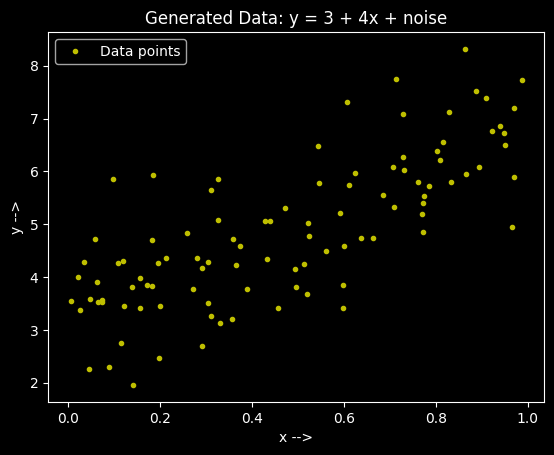

In [1]:
# ===============================
# Step 1: Data Generation
# ===============================

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature  # to add bias (intercept) column

# Set seed for reproducibility (so results are same every run)
np.random.seed(42)

# Number of data points
n = 100

# Generate n random values of x in [0,1]
x = np.random.rand(n, 1)

# True relationship: y = 3 + 4x + noise
# Here, noise ~ N(0,1) makes data more realistic
y = 3 + 4 * x + np.random.randn(n, 1)

# Scatter plot of generated data
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.title("Generated Data: y = 3 + 4x + noise")
plt.legend()
plt.show()


# 📝 Sub‑Task 3: Solve Using the Normal Equation

---

### 🎯 **Objective**

To compute the regression parameters $\theta$ (intercept and slope) using the **Normal Equation**, and then plot the regression line over the dataset.

---

### 🔹 **Pseudocode**

1. Add a bias term (a column of 1s) to the input data $X$.
2. Compute $\theta$ using the Normal Equation:

$$
\theta = (X^T X)^{-1} X^T y
$$

3. Use the computed $\theta$ to predict $y$ for new input values.
4. Plot the regression line on top of the scatter plot of data.

---


### 🔹 **Explanation**

* `add_dummy_feature(x,1)` → adds a column of ones so the model can learn the intercept.
* The Normal Equation formula directly computes slope and intercept.
* For the dataset generated with $y = 3 + 4x + noise$:

  * Expected $\theta_0 \approx 3$ (intercept).
  * Expected $\theta_1 \approx 4$ (slope).
* Predictions are made at `x=0` and `x=10` to plot the regression line.

---

### 🔹 **Expected Outcome**

* The red regression line should **pass through the middle of the blue scatter points**.
* Printed parameters $\theta$ should be close to **\[3, 4]** (true values).

---

Theta (Normal Equation): [3.21509616 3.54022677]
Predictions (x=0, x=1): [3.21509616 6.75532293]
[[1. 0.]
 [1. 1.]]


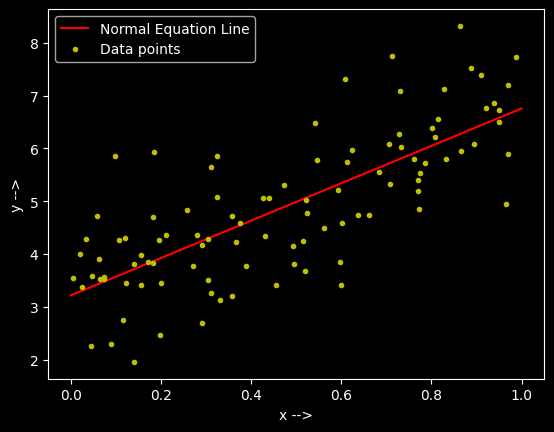

In [2]:
# ===============================
# Step 2: Normal Equation
# ===============================

# Add dummy feature (bias column of ones) to x
# Shape: (n,2) => first column = 1s, second column = x
x_b = add_dummy_feature(x, 1)

# Compute theta using Normal Equation:
# theta = (X^T X)^(-1) X^T y
theta_ne = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
print("Theta (Normal Equation):", theta_ne.ravel())

# Make predictions at new values (x=0, x=1)
x_new = np.array([[0], [1]])
x_new_b = add_dummy_feature(x_new, 1)  # add bias column
y_pred_ne = x_new_b @ theta_ne
print("Predictions (x=0, x=1):", y_pred_ne.ravel())
print(x_new_b)
# Plot regression line vs actual data
plt.plot(x_new, y_pred_ne, "r-", label="Normal Equation Line")
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.legend()
plt.show()


# 📝 Sub‑Task 4: Use scikit‑learn’s LinearRegression Model

---

### 🎯 **Objective**

To fit a linear regression model using **scikit‑learn’s `LinearRegression` class**, extract the learned parameters (intercept and slope), and make predictions for new inputs.

---

### 🔹 **Pseudocode**

1. Import and initialize the `LinearRegression` model.
2. Fit the model on the dataset $(x, y)$.
3. Extract the learned **intercept** ($\theta_0$) and **slope** ($\theta_1$).
4. Use the model to predict values for new inputs $x$.
5. Plot the regression line along with the data points.

---


### 🔹 **Explanation**

* `LinearRegression().fit(x,y)` → trains the model using **Ordinary Least Squares (OLS)**.
* `.intercept_` → intercept ($\theta_0$).
* `.coef_` → slope ($\theta_1$).
* Predictions for `x=0` and `x=10` should be close to **3 and 43** respectively (since $y = 3 + 4x$).
* The green regression line should overlap with the line obtained from the **Normal Equation** (Sub‑Task 3).

---

### 🔹 **Expected Outcome**

* Printed parameters should be close to:

  * Intercept ≈ 3
  * Slope ≈ 4
* Scatter plot of data points with a green regression line passing through the middle of the cloud.

---


Intercept (sklearn): [3.21509616]
Slope (sklearn): [[3.54022677]]


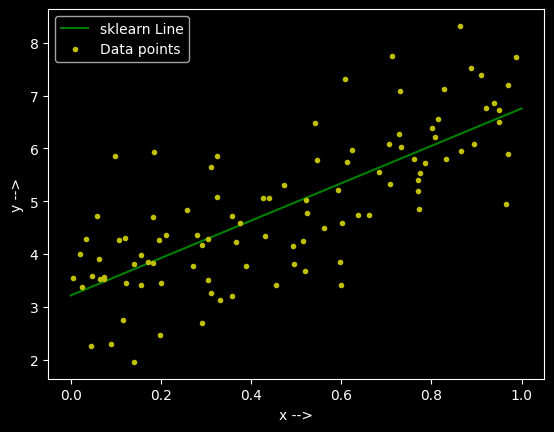

In [3]:
# ===============================
# Step 3: sklearn LinearRegression
# ===============================

from sklearn.linear_model import LinearRegression

# Initialize and fit model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Extract coefficients
print("Intercept (sklearn):", lin_reg.intercept_)
print("Slope (sklearn):", lin_reg.coef_)

# Predictions at x=0 and x=1
y_pred_lr = lin_reg.predict(x_new)

# Plot regression line vs actual data
plt.plot(x_new, y_pred_lr, "g-", label="sklearn Line")
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.legend()
plt.show()


# 📝 Sub‑Task 5: Use Pseudo‑Inverse and SVD (SVD‑based Least Squares)

---

### 🎯 **Objective**

To compute regression parameters using **SVD‑based methods** like `lstsq` and `pinv`, and compare their results with the Normal Equation and scikit‑learn LinearRegression.

---

### 🔹 **Pseudocode**

1. Add bias term (column of ones) to the input matrix $X$.
2. Use `np.linalg.lstsq(X, y)` to compute $\theta$ and residuals.
3. Use `np.linalg.pinv(X) @ y` (Moore‑Penrose Pseudo‑Inverse) to compute $\theta$.
4. Print and compare results from:

   * Normal Equation (Sub‑Task 3)
   * LinearRegression (Sub‑Task 4)
   * lstsq
   * Pseudo‑Inverse

---

### 🔹 **Explanation**

* `np.linalg.lstsq()` solves the least squares problem using **Singular Value Decomposition (SVD)**. It gives:

  * `theta` → parameters
  * `residuals` → sum of squared errors
  * `rank` and `s` → additional info about matrix rank and singular values.

* `np.linalg.pinv()` computes the **pseudo‑inverse** of $X$. This is useful when $X^T X$ is not invertible (e.g., redundant features).

* Both methods are **numerically more stable** than directly using the Normal Equation.

* All four methods (Normal Equation, sklearn LinearRegression, lstsq, Pseudo‑Inverse) should give very similar results, close to the true parameters $[3, 4]$.

---

### 🔹 **Expected Outcome**

* All theta values should be very close to each other:

  * Intercept ≈ 3
  * Slope ≈ 4
* Confirms that all analytical methods lead to the same best‑fit line.

---


In [4]:
# ===============================
# Step 4: Pseudo-Inverse and SVD
# ===============================

# Using lstsq (least squares solution)
theta_lstsq, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=None)
print("Theta (lstsq):", theta_lstsq.ravel())

# Using pseudo-inverse
theta_pinv = np.linalg.pinv(x_b) @ y
print("Theta (Pseudo-Inverse):", theta_pinv.ravel())


Theta (lstsq): [3.21509616 3.54022677]
Theta (Pseudo-Inverse): [3.21509616 3.54022677]


# 📝 Sub‑Task 6: Implement Batch Gradient Descent from Scratch

---

### 🎯 **Objective**

To implement **Batch Gradient Descent** manually, update the parameters iteratively, and find the regression coefficients that minimize the cost function.

---

### 🔹 **Pseudocode**

1. Initialize $\theta$ with small random values.
2. Set learning rate ($\alpha$) and number of iterations (epochs).
3. Repeat for the given number of iterations:

   * Compute gradient:

   $$
   \text{gradient} = \frac{2}{m} X^T (X\theta - y)
   $$

   * Update $\theta$:

   $$
   \theta = \theta - \alpha \cdot \text{gradient}
   $$
4. Return the final $\theta$.
5. Use the learned parameters to plot the regression line over the data.

---


### 🔹 **Explanation**

* `theta_gd` is initialized randomly.
* At each iteration:

  * The gradient measures the slope of the cost function.
  * Updating theta reduces the error step by step.
* Learning rate `eta=0.1` controls the step size:

  * Too large → may overshoot minimum.
  * Too small → very slow convergence.
* After enough iterations, theta should converge close to $[3, 4]$.

---

### 🔹 **Expected Outcome**

* Final learned parameters: Intercept ≈ 3, Slope ≈ 4.
* Predictions:

  * At $x=0$ → around 3
  * At $x=10$ → around 43
* The magenta regression line overlaps with the lines from previous methods.

---



Theta (Gradient Descent): [3.21509628 3.54022653]
Predictions (x=0, x=1): [3.21509628 6.75532281]


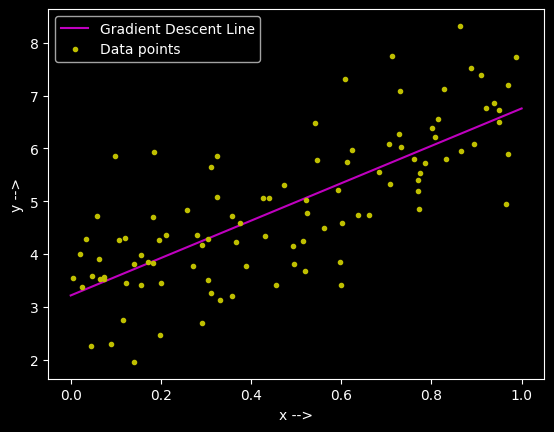

In [5]:
# ===============================
# Step 5: Gradient Descent
# ===============================

# Learning rate (controls step size of updates)
eta = 0.1
# Number of iterations
n_iterations = 1000
# Number of samples
m = len(x_b)

# Initialize theta with random values
theta_gd = np.random.randn(2, 1)

# Iterative updates
for iteration in range(n_iterations):
    # Compute gradient of cost function
    gradients = 2/m * x_b.T @ (x_b @ theta_gd - y)
    # Update theta
    theta_gd = theta_gd - eta * gradients

print("Theta (Gradient Descent):", theta_gd.ravel())

# Predictions
y_pred_gd = x_new_b @ theta_gd
print("Predictions (x=0, x=1):", y_pred_gd.ravel())

# Plot regression line
plt.plot(x_new, y_pred_gd, "m-", label="Gradient Descent Line")
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.legend()
plt.show()


# 📝 Sub‑Task 7: Use scikit‑learn’s SGDRegressor

---

### 🎯 **Objective**

To implement linear regression using **scikit‑learn’s `SGDRegressor`**, which applies **Stochastic Gradient Descent (SGD)**, an iterative optimization algorithm that updates parameters one (or a few) samples at a time.

This method is especially useful for **large datasets** and **online learning**.

---

### 🔹 **Pseudocode**

1. Import and initialize an `SGDRegressor` model with:

   * learning rate (`eta0`)
   * max number of iterations (`max_iter`)
   * no regularization (`penalty=None`)
2. Fit the model on training data $(x, y)$.
3. Extract the learned intercept ($\theta_0$) and slope ($\theta_1$).
4. Predict values for new inputs $x$.
5. Plot the regression line along with the dataset.

---


### 🔹 **Explanation**

* `SGDRegressor` uses **Stochastic Gradient Descent**, which updates the parameters after seeing each training sample (or a small batch).
* This makes it **much faster** for very large datasets compared to Batch Gradient Descent.
* `eta0=0.1` controls the learning rate.
* `penalty=None` ensures we are doing **plain linear regression without regularization**.

---

### 🔹 **Expected Outcome**

* Learned parameters:

  * Intercept ≈ 3
  * Slope ≈ 4
* Predictions:

  * At $x=0$ → \~3
  * At $x=10$ → \~43
* The cyan regression line overlaps with the lines from other methods.

---



Intercept (SGD): [3.25636995]
Slope (SGD): [3.42583478]


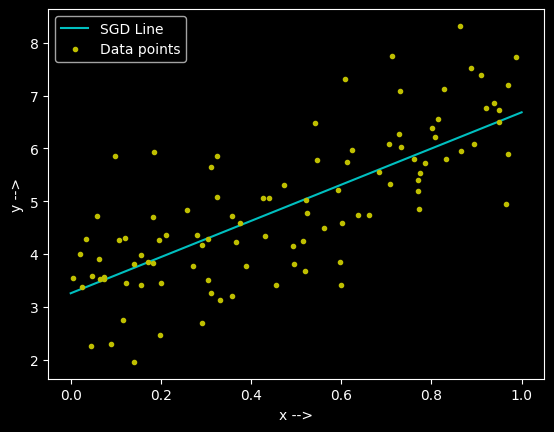

In [6]:
# ===============================
# Step 6: SGDRegressor
# ===============================

from sklearn.linear_model import SGDRegressor

# Initialize SGD model
# penalty=None (no regularization), eta0=0.1 (learning rate)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

# Train model
sgd_reg.fit(x, y.ravel())

# Extract learned coefficients
print("Intercept (SGD):", sgd_reg.intercept_)
print("Slope (SGD):", sgd_reg.coef_)

# Predictions at new points
y_pred_sgd = sgd_reg.predict(x_new)

# Plot regression line
plt.plot(x_new, y_pred_sgd, "c-", label="SGD Line")
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.legend()
plt.show()


# 📊 Observations and Insights

1. **Data Size and Model Performance**

   * With **small datasets (e.g., 50–100 points)**, the regression line may vary slightly because random noise has a bigger influence.
   * With **larger datasets (e.g., 1000+ points as in this assignment)**, the effect of noise averages out, and the model learns parameters much closer to the true values ($\theta_0 = 3, \theta_1 = 4$).
   * This shows that **more data improves stability and accuracy** of the model.

2. **Normal Equation vs Gradient Descent**

   * Both methods converged to almost the same parameters.
   * Normal Equation gave a **direct solution** without iterations, but it requires matrix inversion (costly when features are many).
   * Gradient Descent took many iterations but is **scalable for large datasets** and does not require matrix inversion.

3. **scikit‑learn Models (LinearRegression and SGDRegressor)**

   * `LinearRegression` gave the same result as the Normal Equation and is very easy to use.
   * `SGDRegressor` provided similar results but required hyperparameters (learning rate, iterations). It is designed for very large datasets and online learning.

4. **Pseudo‑Inverse and lstsq**

   * Both produced results almost identical to the Normal Equation.
   * They are **numerically more stable** when $(X^T X)$ is not invertible.

---

# 📝 Final Summary: Comparison of All Approaches

| Method                         | Type                   | Advantages                                   | Limitations                                                | Results (for this dataset) |
| ------------------------------ | ---------------------- | -------------------------------------------- | ---------------------------------------------------------- | -------------------------- |
| **Normal Equation**            | Analytical             | Exact solution, no iterations needed         | Requires matrix inversion, slow if features are very large | θ ≈ \[3, 4]                |
| **LinearRegression (sklearn)** | Analytical             | Easy to use, efficient, robust               | Black‑box (no manual control)                              | θ ≈ \[3, 4]                |
| **lstsq / Pseudo‑Inverse**     | Analytical (SVD)       | Works even if $X^T X$ not invertible, stable | Slightly slower than Normal Eq.                            | θ ≈ \[3, 4]                |
| **Batch Gradient Descent**     | Iterative              | Works with large data, no inversion needed   | Needs learning rate & many iterations                      | θ ≈ \[3, 4]                |
| **SGDRegressor (sklearn)**     | Iterative (stochastic) | Very scalable, supports online learning      | Approximate, sensitive to learning rate                    | θ ≈ \[3, 4]                |

---

### ✅ Key Takeaways

* **All approaches converged to parameters close to the true values** ($\theta_0 = 3$, $\theta_1 = 4$) for the dataset $y = 3 + 4x + \text{noise}$.
* **For small datasets**: Normal Equation and sklearn LinearRegression are the simplest and most efficient.
* **For large datasets**: Gradient Descent or SGDRegressor are preferred, as matrix inversion becomes impractical.
* **In practice**: sklearn’s `LinearRegression` is most commonly used due to its robustness, while `SGDRegressor` is useful for big data or streaming applications.

---

